In [2]:
import pandas as pd
import numpy as np
from decision_tree import TreePredictor 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv('/Users/tommipremoli8/Desktop/Tree Predictor Project/Dataset/secondary_data.csv', sep=';')
data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [4]:
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


## Data cleaning

In [5]:
data.isna().sum()    

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [6]:
# Remove columns with a lot of missing values
data = data.drop(columns=['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-color            61069 non-null  object 
 11  has-ring              61069 non-null  object 
 12  ring-type             58598 non-null  object 
 13  habitat               61069 non-null  object 
 14  season                61069 non-null  object 
dtypes: float64(3), obje

In [8]:
# Remove rows with missing values
data = data.dropna()
data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,3.93,6.22,y,f,f,d,a
61065,p,1.27,f,s,y,f,f,f,3.18,5.43,y,f,f,d,a
61066,p,1.27,s,s,y,f,f,f,3.86,6.37,y,f,f,d,u
61067,p,1.24,f,s,y,f,f,f,3.56,5.44,y,f,f,d,u


## Exploratory Data Analysis
### Study of the binary variable

In [9]:
mappings = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 's': 'sunken', 'p': 'spherical', 'o': 'others'},
    'cap-surface': {'i': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth', 'h': 'shiny', 'l': 'leathery', 'k': 'silky', 't': 'sticky', 'w': 'wrinkled', 'e': 'fleshy'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black'},
    'does-bruise-bleed': {'t': 'bruises-or-bleeding', 'f': 'no'},
    'gill-attachment': {'a': 'adnate', 'x': 'adnexed', 'd': 'decurrent', 'e': 'free', 's': 'sinuate', 'p': 'pores', 'f': 'none', '?': 'unknown'},
    'gill-spacing': {'c': 'close', 'd': 'distant', 'f': 'none'},
    'gill-color': {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black', 'f': 'none'},
    'stem-root': {'b': 'bulbous', 's': 'swollen', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted'},
    'stem-color': {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black', 'f': 'none'},
    'has-ring': {'t': 'ring', 'f': 'none'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'r': 'flaring', 'g': 'grooved', 'l': 'large', 'p': 'pendant', 's': 'sheathing', 'z': 'zone', 'y': 'scaly', 'm': 'movable', 'f': 'none', '?': 'unknown'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black', 'f': 'none'},
    'spore-print-color': {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'h': 'heaths', 'u': 'urban', 'w': 'waste', 'd': 'woods'},
    'season': {'s': 'spring', 'u': 'summer', 'a': 'autumn', 'w': 'winter'}
}

data_copy = data.copy()

# Mappare i valori in tutte le colonne tranne 'class'
for col, mapping in mappings.items():
    if col in data.columns:
        data_copy[col] = data_copy[col].map(mapping)

In [10]:
data_copy.shape

(37065, 15)

/var/folders/85/5nsqwlmd1xx9qfh9rn8rll2c0000gn/T/ipykernel_2587/2452556703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_copy['class'], palette=['#960018', '#007BB8'])


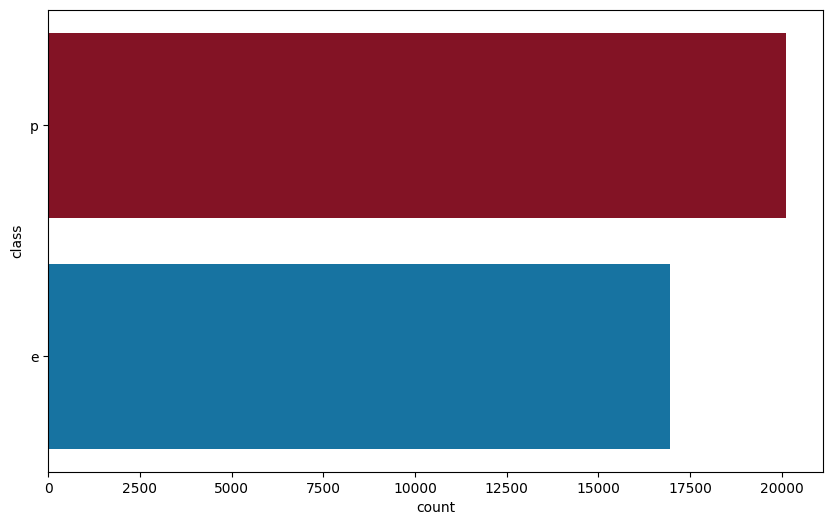

In [11]:
# Target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(data_copy['class'], palette=['#960018', '#007BB8'])
plt.show()

In [12]:
count = data[data['class'] == 'e'].value_counts().sum()
perc = data[data['class'] == 'e'].value_counts().sum() / data['class'].value_counts().sum()
print(f'Edible mushrooms: {count} ({perc:.2%})')

Edible mushrooms: 16944 (45.71%)


In [13]:
count = data[data['class'] == 'p'].value_counts().sum()
perc = data[data['class'] == 'p'].value_counts().sum() / data['class'].value_counts().sum()
print(f'Poisonous mushrooms: {count} ({perc:.2%})')

Poisonous mushrooms: 20121 (54.29%)


/var/folders/85/5nsqwlmd1xx9qfh9rn8rll2c0000gn/T/ipykernel_2587/3233882352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=column, data=data_copy, palette=['#960018', '#007BB8'])


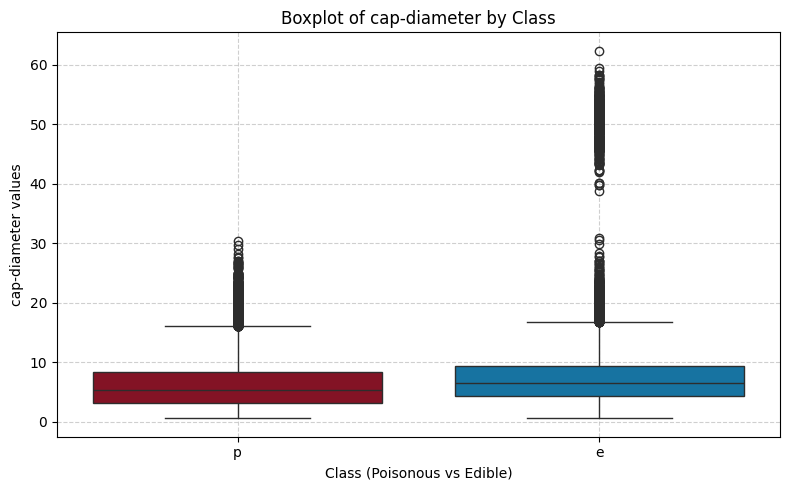

/var/folders/85/5nsqwlmd1xx9qfh9rn8rll2c0000gn/T/ipykernel_2587/3233882352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=column, data=data_copy, palette=['#960018', '#007BB8'])


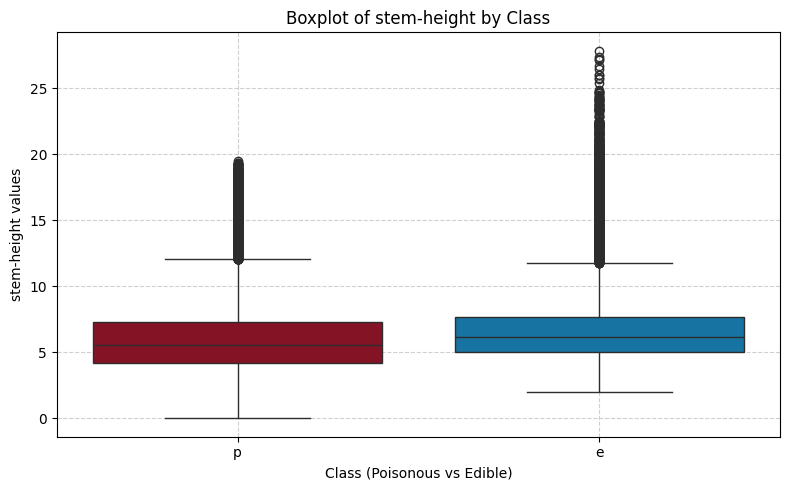

/var/folders/85/5nsqwlmd1xx9qfh9rn8rll2c0000gn/T/ipykernel_2587/3233882352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=column, data=data_copy, palette=['#960018', '#007BB8'])


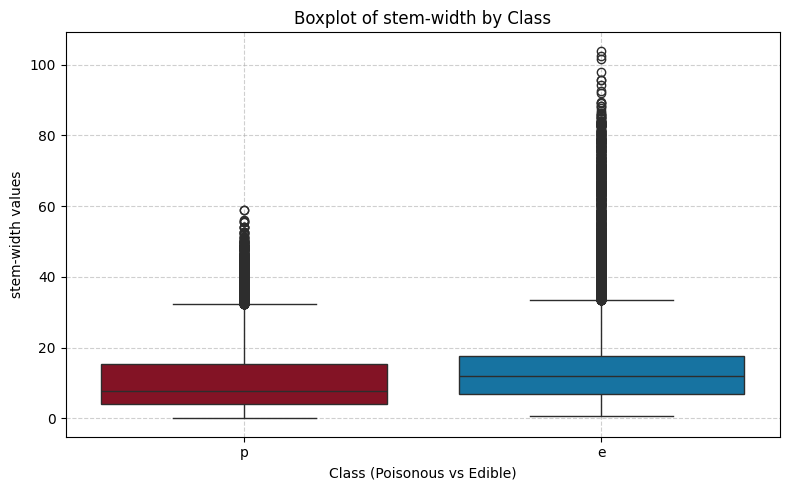

In [14]:
# distribution of numerical features
for column in data_copy.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='class', y=column, data=data_copy, palette=['#960018', '#007BB8'])
    plt.title(f'Boxplot of {column} by Class')
    plt.xlabel('Class (Poisonous vs Edible)')
    plt.ylabel(f'{column} values')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

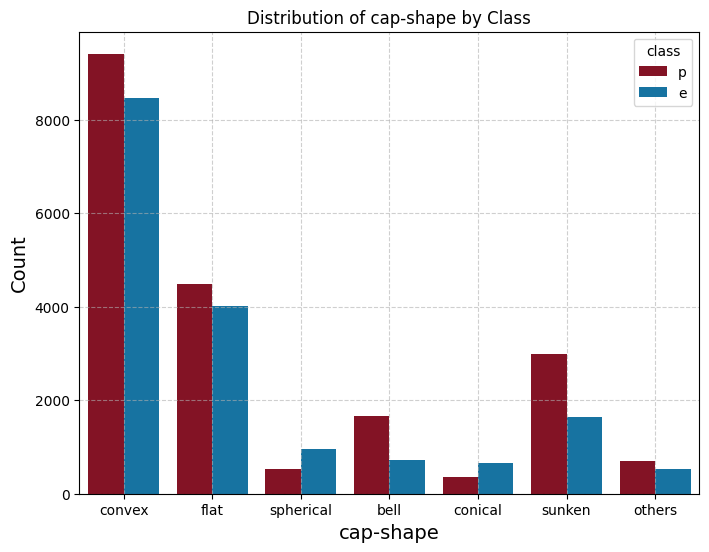

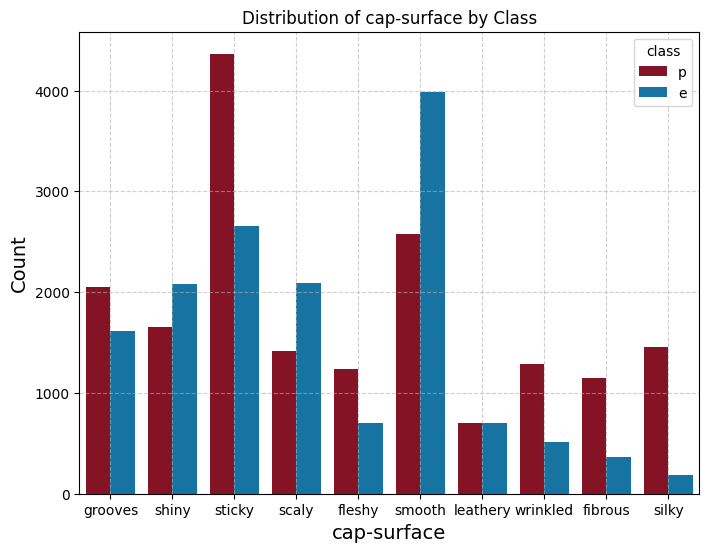

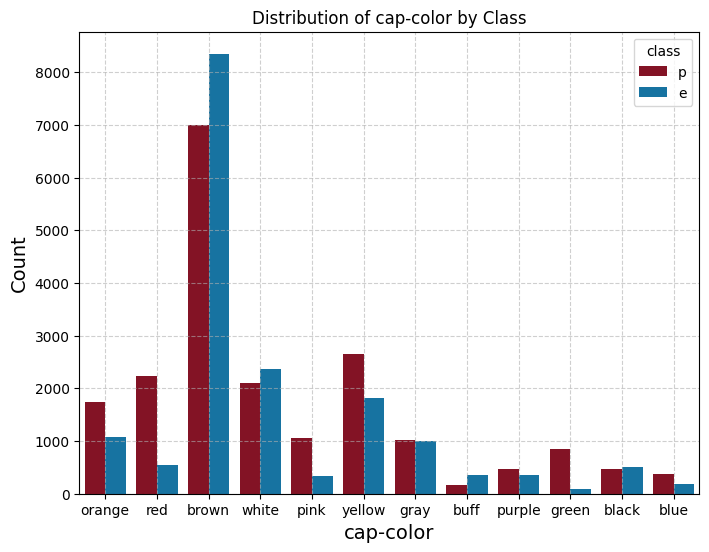

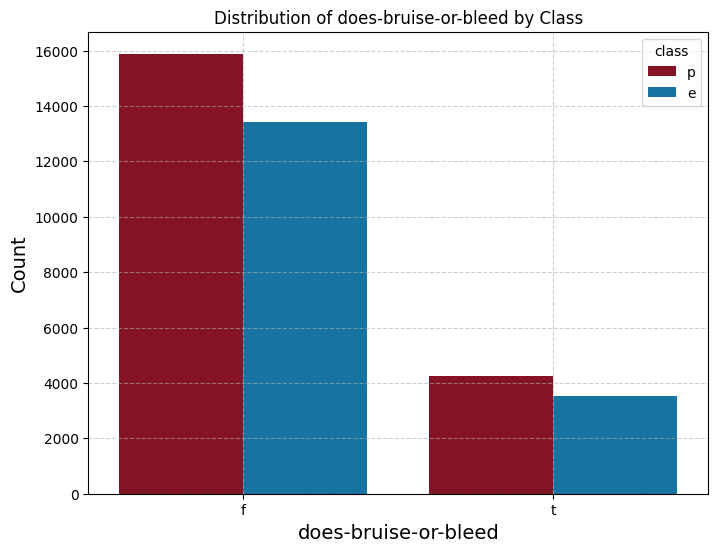

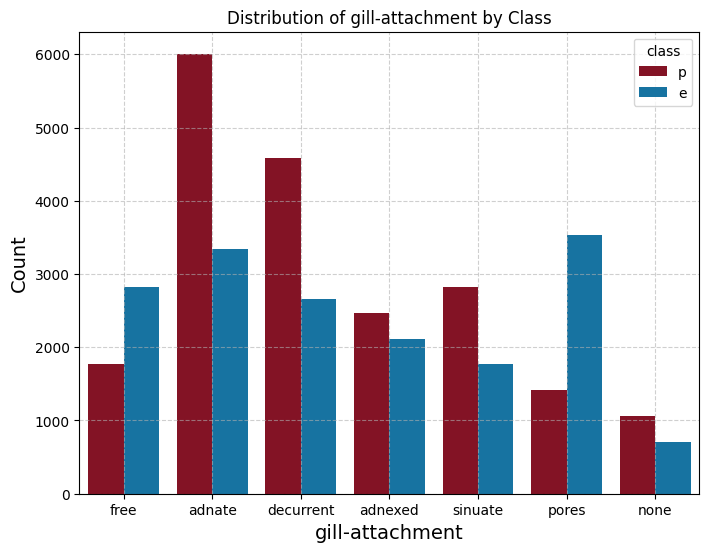

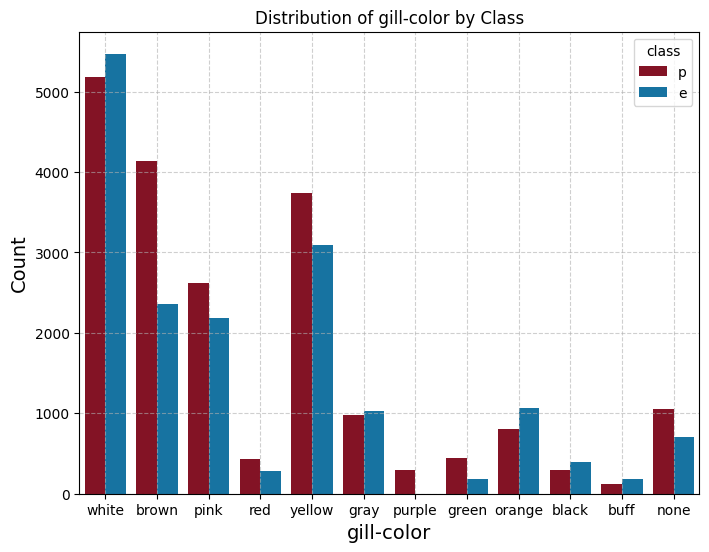

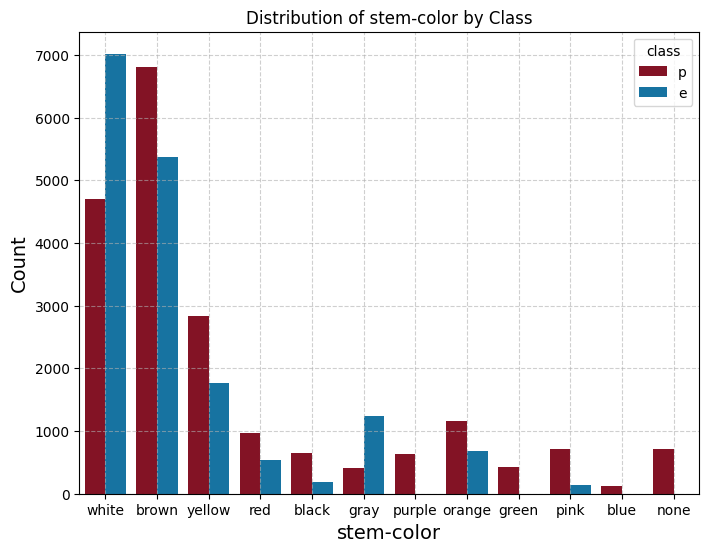

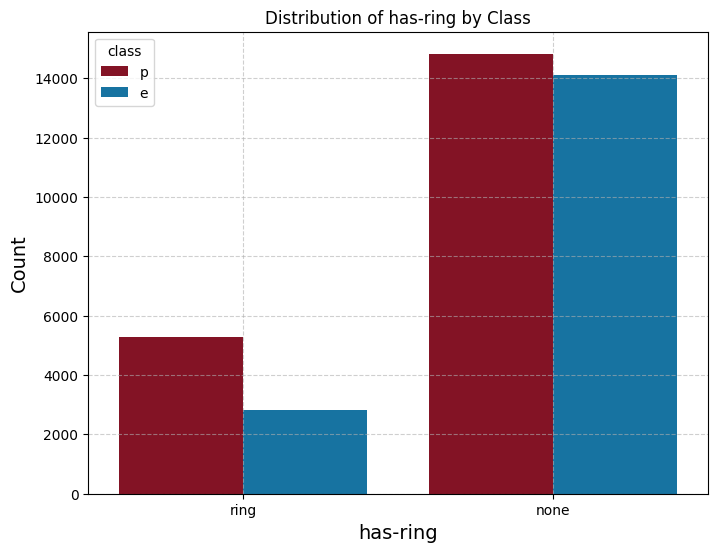

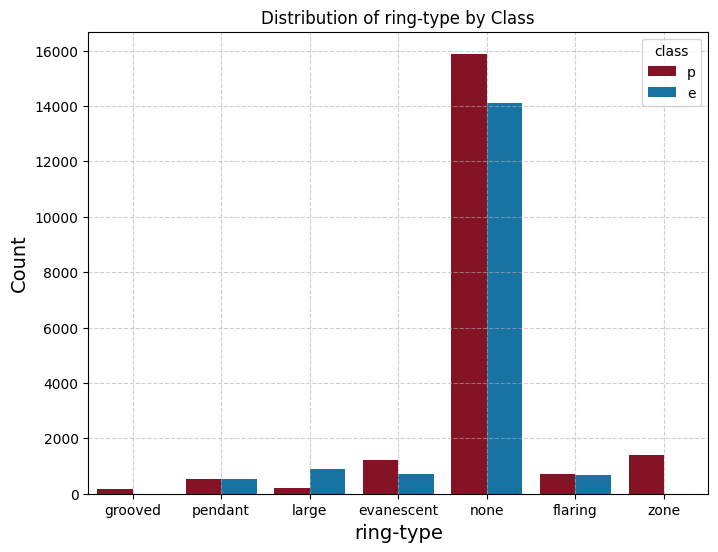

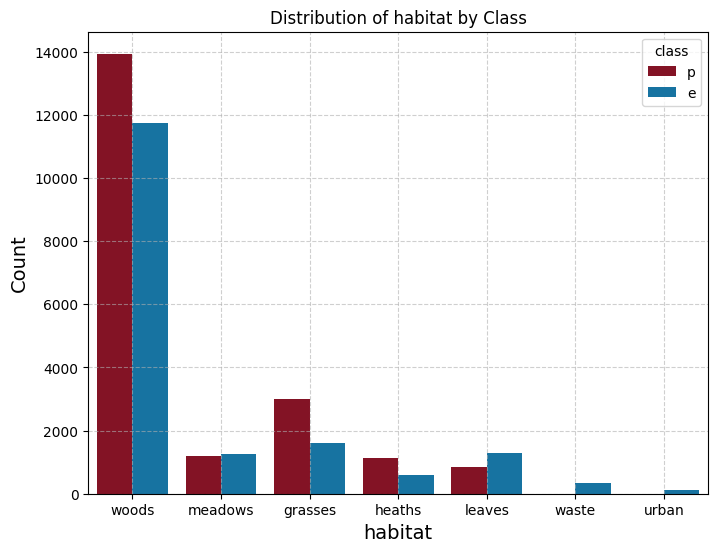

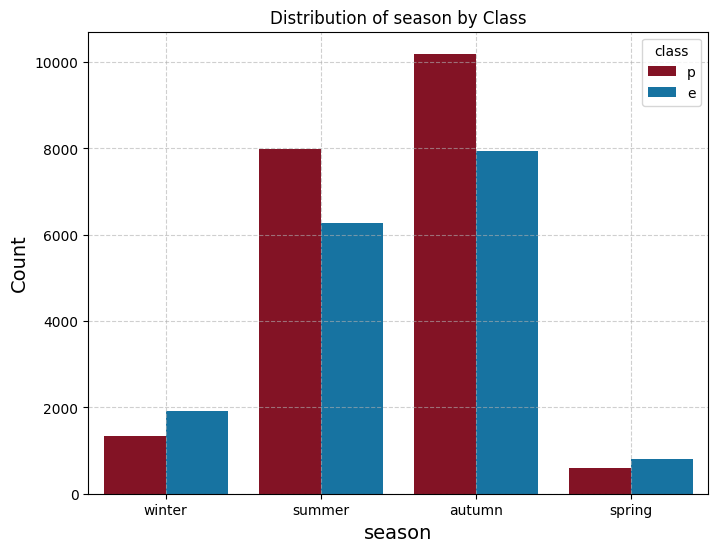

In [15]:
# distribution of categorical features excluding the first columns
for column in data_copy.select_dtypes(include=['object']).columns:
        if column != 'class':
                plt.figure(figsize=(8, 6))
                sns.countplot(x=column, hue='class', data=data_copy, palette=['#960018', '#007BB8'])
                plt.title(f'Distribution of {column} by Class')
                plt.xlabel(column, fontsize=14)
                plt.ylabel('Count', fontsize=14)
                plt.grid(True, linestyle='--', alpha=0.6)
                plt.show()

## Train-test splitting

In [16]:
# Split the dataset into training and test data
data = data.sample(frac=1, random_state=1234).reset_index(drop=True)

test_size = 0.2
test_data_size = int(len(data) * test_size)

test_data = data[:test_data_size]
train_data = data[test_data_size:]

X_train = train_data.drop(columns=['class'])
y_train = train_data['class'].map({'p': 1, 'e': 0})

X_test = test_data.drop(columns=['class'])
y_test = test_data['class'].map({'p': 1, 'e': 0})

## Implement the model and compute the accuracy

In [17]:
# Create the three models with different criteria: Entropy, Gini and MSE
clf_entropy = TreePredictor(max_depth=5, min_samples_split=500, criterion="entropy")
clf_gini = TreePredictor(max_depth=5, min_samples_split=500, criterion="gini")
clf_mse = TreePredictor(max_depth=5, min_samples_split=500, criterion="mse_reduction")

# Train the models
clf_entropy.fit(X_train, y_train)
clf_gini.fit(X_train, y_train)
clf_mse.fit(X_train, y_train)

In [18]:
# Calculate the predictions and the accuracy of the models
predictions_entropy = clf_entropy.predict(X_test)
predictions_gini = clf_gini.predict(X_test)
predictions_mse = clf_mse.predict(X_test)

accuracy_entropy = np.mean(predictions_entropy == y_test)
accuracy_gini = np.mean(predictions_gini == y_test)
accuracy_mse = np.mean(predictions_mse == y_test)

print(f"Model accuracy with 'Scaled Entropy': {accuracy_entropy:.4f}")
print(f"Model accuracy with 'Gini Index': {accuracy_gini:.4f}")
print(f"Model accuracy with 'MSE distance': {accuracy_mse:.4f}")

Model accuracy with 'Scaled Entropy': 0.7638
Model accuracy with 'Gini Index': 0.7811
Model accuracy with 'MSE distance': 0.6185


### Zero-One Loss

In [19]:
# Training error (zero-one loss)
training_error_entropy = clf_entropy.compute_zero_one_loss(X_train, y_train)
training_error_gini = clf_gini.compute_zero_one_loss(X_train, y_train)
training_error_mse = clf_mse.compute_zero_one_loss(X_train, y_train)

print(f"Training error (zero-one loss) with 'Scaled Entropy': {training_error_entropy:.4f}")
print(f"Training error (zero-one loss) with 'Gini Index': {training_error_gini:.4f}")
print(f"Training error (zero-one loss) with 'MSE distance': {training_error_mse:.4f}")

Training error (zero-one loss) with 'Scaled Entropy': 0.2298
Training error (zero-one loss) with 'Gini Index': 0.2098
Training error (zero-one loss) with 'MSE distance': 0.3848


In [20]:
# Test error (zero-one loss)
test_error_entropy = clf_entropy.compute_zero_one_loss(X_test, y_test)
test_error_gini = clf_gini.compute_zero_one_loss(X_test, y_test)
test_error_mse = clf_mse.compute_zero_one_loss(X_test, y_test)

print(f"Test error (zero-one loss) with 'Scaled Entropy': {test_error_entropy:.4f}")
print(f"Test error (zero-one loss) with 'Gini Index': {test_error_gini:.4f}")
print(f"Test error (zero-one loss) with 'MSE distance': {test_error_mse:.4f}")

Test error (zero-one loss) with 'Scaled Entropy': 0.2362
Test error (zero-one loss) with 'Gini Index': 0.2189
Test error (zero-one loss) with 'MSE distance': 0.3815


## Output of the trees

In [21]:
# Output Gini tree
feature_names = X_train.columns
clf_gini.print_tree(feature_names=feature_names)

Node: stem-width <= 8.94
---> Left:
|   Node: stem-color == g
|   ---> Left:
|   |   Node: gill-attachment == x
|   |   ---> Left:
|   |   |   Leaf: Predicted class = p
|   |   ---> Right:
|   |   |   Leaf: Predicted class = e
|   ---> Right:
|   |   Node: stem-height <= 3.28
|   |   ---> Left:
|   |   |   Node: stem-color == w
|   |   |   ---> Left:
|   |   |   |   Node: habitat == g
|   |   |   |   ---> Left:
|   |   |   |   |   Leaf: Predicted class = p
|   |   |   |   ---> Right:
|   |   |   |   |   Leaf: Predicted class = e
|   |   |   ---> Right:
|   |   |   |   Node: stem-width <= 7.06
|   |   |   |   ---> Left:
|   |   |   |   |   Leaf: Predicted class = p
|   |   |   |   ---> Right:
|   |   |   |   |   Leaf: Predicted class = e
|   |   ---> Right:
|   |   |   Node: cap-color == g
|   |   |   ---> Left:
|   |   |   |   Leaf: Predicted class = e
|   |   |   ---> Right:
|   |   |   |   Node: gill-attachment == d
|   |   |   |   ---> Left:
|   |   |   |   |   Leaf: Predicted class

In [22]:
# Output entropy tree
feature_names = X_train.columns
clf_entropy.print_tree(feature_names=feature_names)

Node: stem-width <= 8.94
---> Left:
|   Node: stem-color == g
|   ---> Left:
|   |   Node: gill-attachment == x
|   |   ---> Left:
|   |   |   Leaf: Predicted class = p
|   |   ---> Right:
|   |   |   Leaf: Predicted class = e
|   ---> Right:
|   |   Node: stem-height <= 3.2
|   |   ---> Left:
|   |   |   Node: stem-color == w
|   |   |   ---> Left:
|   |   |   |   Leaf: Predicted class = p
|   |   |   ---> Right:
|   |   |   |   Node: stem-width <= 7.06
|   |   |   |   ---> Left:
|   |   |   |   |   Leaf: Predicted class = p
|   |   |   |   ---> Right:
|   |   |   |   |   Leaf: Predicted class = e
|   |   ---> Right:
|   |   |   Node: ring-type == e
|   |   |   ---> Left:
|   |   |   |   Leaf: Predicted class = p
|   |   |   ---> Right:
|   |   |   |   Node: ring-type == z
|   |   |   |   ---> Left:
|   |   |   |   |   Leaf: Predicted class = p
|   |   |   |   ---> Right:
|   |   |   |   |   Leaf: Predicted class = p
---> Right:
|   Node: gill-attachment == d
|   ---> Left:
|   |   No

In [23]:
# Output Means Squared Error tree
feature_names = X_train.columns
clf_mse.print_tree(feature_names=feature_names)

Node: ring-type == z
---> Left:
|   Leaf: Predicted class = p
---> Right:
|   Node: stem-height <= 3.2
|   ---> Left:
|   |   Node: stem-width <= 3.77
|   |   ---> Left:
|   |   |   Node: stem-height <= 2.98
|   |   |   ---> Left:
|   |   |   |   Leaf: Predicted class = p
|   |   |   ---> Right:
|   |   |   |   Leaf: Predicted class = p
|   |   ---> Right:
|   |   |   Node: cap-color == w
|   |   |   ---> Left:
|   |   |   |   Leaf: Predicted class = p
|   |   |   ---> Right:
|   |   |   |   Node: stem-width <= 8.11
|   |   |   |   ---> Left:
|   |   |   |   |   Leaf: Predicted class = p
|   |   |   |   ---> Right:
|   |   |   |   |   Leaf: Predicted class = e
|   ---> Right:
|   |   Node: stem-color == u
|   |   ---> Left:
|   |   |   Leaf: Predicted class = p
|   |   ---> Right:
|   |   |   Node: gill-attachment == p
|   |   |   ---> Left:
|   |   |   |   Node: cap-shape == f
|   |   |   |   ---> Left:
|   |   |   |   |   Leaf: Predicted class = p
|   |   |   |   ---> Right:
|   |   

## Confusion matrix

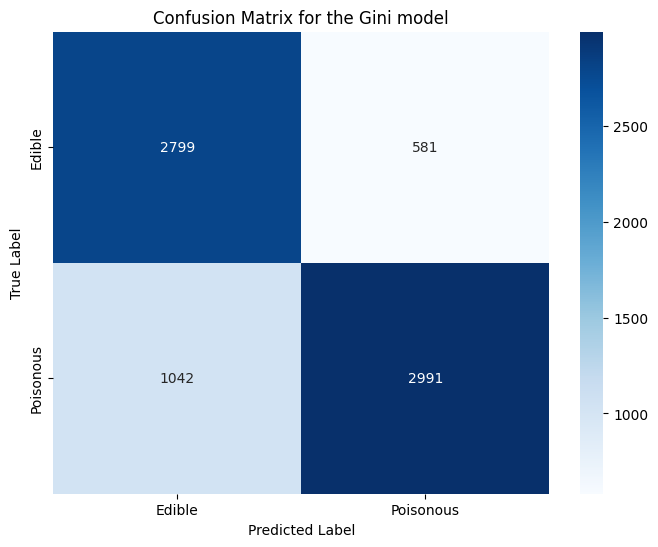

In [24]:
# Confusion matrix for the Gini model
y_pred = clf_gini.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for the Gini model")
plt.show()

## Hyperparameter tuning

In [25]:
grid_search = {"max_depth": [], "min_samples": [], "accuracy_train": [], "accuracy_test": []}

for max_depth in range(3, 7):
    for min_samples_split in range(500, 3000, 500): 
        tree = TreePredictor(max_depth=max_depth, min_samples_split=min_samples_split, criterion='gini')
        tree.fit(X_train, y_train)

        y_pred_train = tree.predict(X_train)
        y_pred_test = tree.predict(X_test)

        accuracy_train = np.mean(y_train == y_pred_train)
        accuracy_test = np.mean(y_test == y_pred_test)

        grid_search["max_depth"].append(max_depth)
        grid_search["min_samples"].append(min_samples_split)
        grid_search["accuracy_train"].append(accuracy_train)
        grid_search["accuracy_test"].append(accuracy_test)

    print(f"Progress: max_depth={max_depth}/6")

grid_search_df = pd.DataFrame(grid_search)

best_params = grid_search_df.sort_values("accuracy_test", ascending=False).iloc[0]
print(f"Best parameters: max_depth={best_params['max_depth']}, min_samples_split={best_params['min_samples']}")
print(f"Test accuracy: {best_params['accuracy_test']:.4f}")

Progress: max_depth=3/6
Progress: max_depth=4/6
Progress: max_depth=5/6
Progress: max_depth=6/6
Best parameters: max_depth=6.0, min_samples_split=500.0
Test accuracy: 0.8191


In [35]:
grid_search_df.sort_values("accuracy_test", ascending=False)

,max_depth,min_samples,accuracy_train,accuracy_test
15,6,500,0.820754,0.819102
16,6,1000,0.811817,0.809659
17,6,1500,0.796574,0.795629
10,5,500,0.790166,0.781060
18,6,2000,0.780925,0.779981
19,6,2500,0.780925,0.779981
11,5,1000,0.783556,0.773911
5,4,500,0.768616,0.762714
12,5,1500,0.768312,0.759881
13,5,2000,0.767908,0.759611


## Accuracy visualization

In [26]:
# Plot the accuracy of the model with different max_depth values
train_accuracies = []
test_accuracies = []

for max_depth in range(1, 25):
    tree = TreePredictor(max_depth=max_depth, min_samples_split=500, criterion='gini')
    tree.fit(X_train, y_train)

    y_pred_train = tree.predict(X_train)
    y_pred_test = tree.predict(X_test)

    accuracy_train = np.mean(y_train == y_pred_train)
    accuracy_test = np.mean(y_test == y_pred_test)

    train_accuracies.append(accuracy_train)
    test_accuracies.append(accuracy_test)

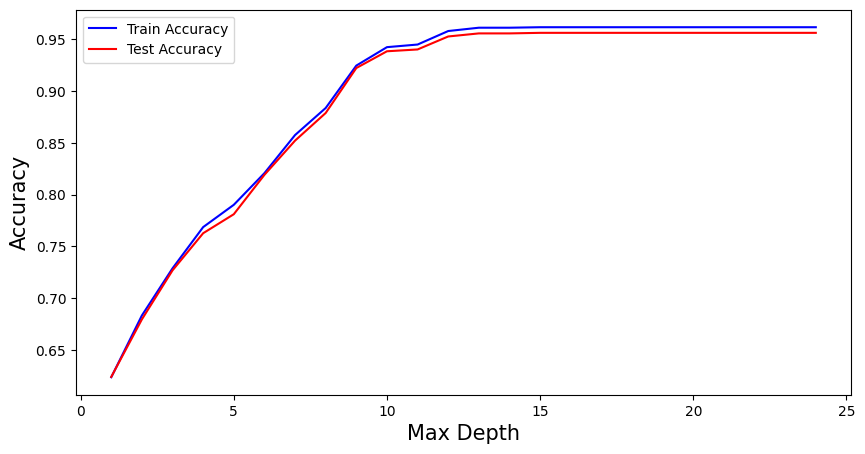

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 25), train_accuracies, label="Train Accuracy", color='b')
plt.plot(range(1, 25), test_accuracies, label="Test Accuracy", color='r')
plt.xticks(range(0, 26, 5))
plt.xlabel("Max Depth", size=15)
plt.ylabel("Accuracy", size=15)
plt.legend(loc="upper left")

## K-fold cross validation

In [28]:
data = data.sample(frac=1, random_state=1234).reset_index(drop=True)

# K-fold Cross-Validation
def kfold_indices(df, k):
    fold_size = len(df) // k
    indices = np.arange(len(df))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

k = 5
fold_indices = kfold_indices(data, k)

In [29]:
scores = []

# K-Fold Cross-Validation
for train_indices, test_indices in fold_indices:
    train_df = data.iloc[train_indices]
    test_df = data.iloc[test_indices]

    X_train = train_df.drop(columns=['class'])
    y_train = train_df['class'].map({'p': 1, 'e': 0}) 
    X_test = test_df.drop(columns=['class'])
    y_test = test_df['class'].map({'p': 1, 'e': 0})

    clf_gini.fit(X_train, y_train)

    y_pred_test = clf_gini.predict(X_test)

    fold_score = accuracy_score(y_test, y_pred_test)
    scores.append(fold_score)

    print(f"Fold Accuracy: {fold_score:.4f}")

Fold Accuracy: 0.7875
Fold Accuracy: 0.7726
Fold Accuracy: 0.7789
Fold Accuracy: 0.7904
Fold Accuracy: 0.7883


In [30]:
mean_accuracy = np.mean(scores)
print(f"Mean Accuracy: {mean_accuracy:.4f}")

Mean Accuracy: 0.7835


In [41]:
for i, score in enumerate(scores):
    print(f"Fold {i + 1} Accuracy: {score:.4f}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")

Fold 1 Accuracy: 0.7875
Fold 2 Accuracy: 0.7726
Fold 3 Accuracy: 0.7789
Fold 4 Accuracy: 0.7904
Fold 5 Accuracy: 0.7883
Mean Accuracy: 0.7835
